In [219]:
#Libraries for data processing
import numpy as np 
import pandas as pd

#Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(color_codes = True)
sns.set(font_scale=1.5) #fixing font size

#Libraries for artificial neural network
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Normalization
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.preprocessing import MinMaxScaler

In [220]:
from logging import RootLogger
# Mount Google Drive
from google.colab import drive #import drive from google colab

root = "/content/drive"     #default location for the drive

drive.mount(root)           #we mount the google drive at /content/drive

#import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  

#path to your project on Google Drive
my_google_drive_path = "MyDrive/StudentProject2023"

project_path = join(root, my_google_drive_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [221]:
train_data = pd.read_csv(join(project_path,"processed_data/train_merged_data.csv"), sep=";")

### We are adding more terms to our artificial neural network so it can perform better, these terms are the ones in the liquid drop model

In [222]:
train_data["Surf"] = np.power(train_data["A"],2/3)

train_data["Asym"] = ( (train_data["N"]-train_data["Z"])**2 ) / train_data["A"]

train_data["Coul"] = ( train_data["Z"]*(train_data["Z"]-1) ) / np.power(train_data["A"],1/3)

train_data["Pair"] = np.power(train_data["A"],-1/2)

train_data["Z_parity"] = np.power(-1,train_data["Z"])

train_data["N_parity"] = np.power(-1,train_data["N"])

In [223]:
magic_numbers = [2, 8, 20, 28, 50, 82, 126, 184]

#Adding two columns for the distance with respect to magic numbers
train_data["Z_distance"] = None
train_data["N_distance"] = None

#Compute the distance to magic numbers
for i, row in train_data.iterrows():
    z = row["Z"]
    n = row["N"]
    train_data.at[i, "Z_distance"] = min([abs(z - m) for m in magic_numbers])
    train_data.at[i, "N_distance"] = min([abs(n - m) for m in magic_numbers])

In [224]:
#First inputs
target = train_data["ame_BE"]
n_input = train_data["N"]
z_input = train_data["Z"]

#Liquid drop inputs
surf_input = train_data["Surf"]
asym_input = train_data["Asym"]
coul_input = train_data["Coul"]
pair_input = train_data["Pair"]

#Other inputs that may help
z_parity_input = train_data["Z_parity"]
n_parity_input = train_data["N_parity"]
z_distance_input = train_data["Z_distance"]  
n_distance_input = train_data["N_distance"]


#Artificial networks work best when using data between 0 and 1 

#We rescale our first inputs
train_scaler = MinMaxScaler(feature_range=(0,1))

scaled_n = train_scaler.fit_transform(pd.Series.to_numpy(n_input).reshape(-1,1))
scaled_z = train_scaler.fit_transform(pd.Series.to_numpy(z_input).reshape(-1,1))

#We rescale our liquid drop inputs
scaled_coul = train_scaler.fit_transform(pd.Series.to_numpy(coul_input).reshape(-1,1))
scaled_surf = train_scaler.fit_transform(pd.Series.to_numpy(surf_input).reshape(-1,1))
scaled_asym = train_scaler.fit_transform(pd.Series.to_numpy(asym_input).reshape(-1,1))
scaled_pair = train_scaler.fit_transform(pd.Series.to_numpy(pair_input).reshape(-1,1))

#We rescale our other inputs
scaled_z_parity = train_scaler.fit_transform(pd.Series.to_numpy(z_parity_input).reshape(-1,1))
scaled_n_parity = train_scaler.fit_transform(pd.Series.to_numpy(n_parity_input).reshape(-1,1))
scaled_z_distance = train_scaler.fit_transform(pd.Series.to_numpy(z_distance_input).reshape(-1,1))#####################################
scaled_n_distance = train_scaler.fit_transform(pd.Series.to_numpy(n_distance_input).reshape(-1,1)) 

#We must scale our target in last position to rescale after
scaled_target = train_scaler.fit_transform(pd.Series.to_numpy(target).reshape(-1,1))

In [225]:
input1=keras.layers.Input(shape=(1,))
input2=keras.layers.Input(shape=(1,))
input3=keras.layers.Input(shape=(1,))
input4=keras.layers.Input(shape=(1,))
input5=keras.layers.Input(shape=(1,))
input6=keras.layers.Input(shape=(1,))
input7=keras.layers.Input(shape=(1,))
input8=keras.layers.Input(shape=(1,))
input9=keras.layers.Input(shape=(1,))
input10=keras.layers.Input(shape=(1,))

merged = keras.layers.Concatenate()([input1, input2, input3, input4, input5, input6, input7, input8, input9, input10])
dense1 = keras.layers.Dense(128, input_dim=10, activation="relu")(merged)
dense2 = keras.layers.Dense(128, activation="relu")(dense1)
dense3 = keras.layers.Dense(128, activation="relu")(dense2)
dense4 = keras.layers.Dense(128, activation="relu")(dense3)
dense5 = keras.layers.Dense(128, activation="relu")(dense4)
dense6 = keras.layers.Dense(128, activation="relu")(dense5)
dense7 = keras.layers.Dense(128, activation="relu")(dense6)
dense8 = keras.layers.Dense(128, activation="relu")(dense7)
dense9 = keras.layers.Dense(128, activation="relu")(dense8)
dense10 = keras.layers.Dense(128, activation="relu")(dense9)
output = keras.layers.Dense(1, activation="relu")(dense10)
model4 = keras.models.Model(([input1, input2, input3, input4, input5, input6, input7, input8, input9, input10]),output)

In [226]:
model4.compile(optimizer=Adam(learning_rate=0.0001), loss="mean_squared_error")

Epoch 1/150
104/104 [==============================] - 1s 4ms/step - loss: 0.0836
Epoch 2/150
104/104 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 3/150
104/104 [==============================] - 0s 4ms/step - loss: 2.2675e-04
Epoch 4/150
104/104 [==============================] - 0s 4ms/step - loss: 1.4558e-04
Epoch 5/150
104/104 [==============================] - 0s 4ms/step - loss: 1.0590e-04
Epoch 6/150
104/104 [==============================] - 0s 4ms/step - loss: 7.8711e-05
Epoch 7/150
104/104 [==============================] - 0s 4ms/step - loss: 5.8731e-05
Epoch 8/150
104/104 [==============================] - 0s 4ms/step - loss: 4.6992e-05
Epoch 9/150
104/104 [==============================] - 0s 4ms/step - loss: 4.2380e-05
Epoch 10/150
104/104 [==============================] - 0s 4ms/step - loss: 3.8037e-05
Epoch 11/150
104/104 [==============================] - 0s 4ms/step - loss: 2.9917e-05
Epoch 12/150
104/104 [==============================] - 0s 4

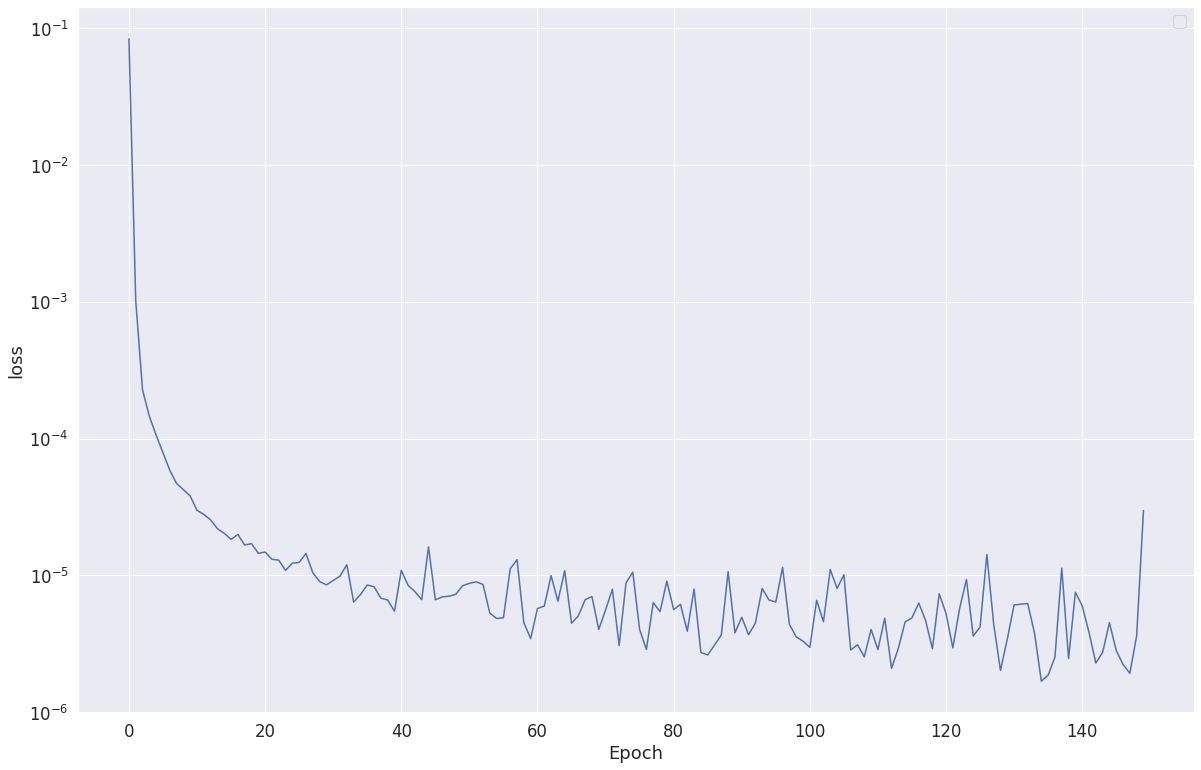

In [227]:
history4=model4.fit(x=(scaled_n, scaled_z, scaled_surf, scaled_coul, scaled_asym, scaled_pair, scaled_n_parity, scaled_z_parity, scaled_n_distance, scaled_z_distance), y=scaled_target, epochs=150, shuffle=True, verbose=1)


plt.figure(figsize =(20,13))
plt.yscale('log')
plt.legend('labels')

plt.plot(history4.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()
#Be careful : loss is mean_squared_error, not RMS, and is calculated among 
#Rescaled variable, so it doesn't mean a lot

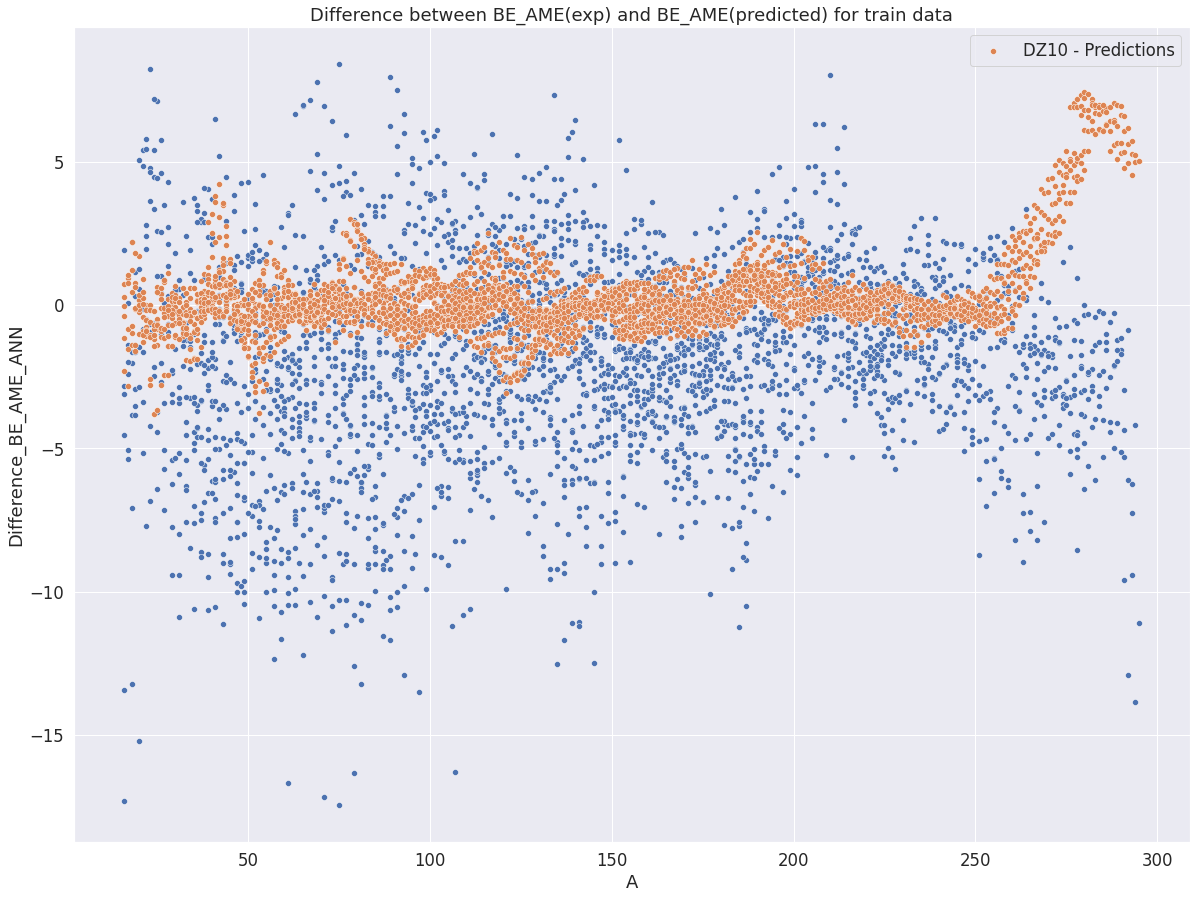

In [228]:
train_predictions = model4.predict(x=([scaled_n, scaled_z, scaled_surf, scaled_coul, scaled_asym, scaled_pair, scaled_n_parity, scaled_z_parity, scaled_n_distance, scaled_z_distance]), verbose=0)

train_rescaled_predictions = [(i - train_scaler.min_)/train_scaler.scale_ for i in train_predictions]


train_data["BE_Predictions"] = np.double(train_rescaled_predictions)
train_data["Difference_BE_AME_ANN"] = train_data["ame_BE"] - train_data["BE_Predictions"]
train_data["Difference_BE_DZ_AME"] = train_data["dz_BE"] - train_data["ame_BE"]

plt.figure(figsize =(20,15))
plt.title("Difference between BE_AME(exp) and BE_AME(predicted) for train data")

sns.scatterplot(x="A",y="Difference_BE_AME_ANN",data=train_data, palette="rainbow_r")
sns.scatterplot(x="A",y="Difference_BE_DZ_AME",data=train_data, palette="rainbow_r", label='DZ10 - Predictions')

In [229]:
rms_train = np.sqrt(((train_data["Difference_BE_AME_ANN"] ** 2).sum()) / len(train_data["Difference_BE_AME_ANN"]))

print('RMS AME:', rms_train)

RMS AME: 3.830327083919005


In [231]:
validation_data = pd.read_csv(join(project_path,"processed_data/validation_merged_data.csv"), sep=";")

validation_data["Surf"] = np.power(validation_data["A"], 2/3)
validation_data["Asym"] = ( (validation_data["N"]-validation_data["Z"])**2 ) / validation_data["A"]
validation_data["Coul"] =  ( validation_data["Z"]*(validation_data["Z"]-1) ) / np.power(validation_data["A"],1/3)
validation_data["Pair"] = np.power(validation_data["A"],-1/2)
validation_data["Z_parity"] = np.power(-1,validation_data["Z"])
validation_data["N_parity"] = np.power(-1,validation_data["N"])

validation_data["Z_distance"] = None
validation_data["N_distance"] = None

# Boucle pour calculer les distances et les stocker dans les nouvelles colonnes
for i, row in validation_data.iterrows():
    z = row["Z"]
    n = row["N"]
    validation_data.at[i, "Z_distance"] = min([abs(z - m) for m in magic_numbers])
    validation_data.at[i, "N_distance"] = min([abs(n - m) for m in magic_numbers])

test_target = validation_data["ame_BE"]
test_n_input = validation_data["N"]
test_z_input = validation_data["Z"]
test_coul_input = validation_data["Coul"]
test_surf_input = validation_data["Surf"]
test_asym_input = validation_data["Asym"]
test_pair_input = validation_data["Pair"]
test_z_parity_input = validation_data["Z_parity"]
test_n_parity_input = validation_data["N_parity"]
test_z_distance_input = validation_data["Z_distance"]
test_n_distance_input = validation_data["N_distance"]

validation_scaler = MinMaxScaler(feature_range=(0,1))
test_scaled_n = validation_scaler.fit_transform(pd.Series.to_numpy(test_n_input).reshape(-1,1))
test_scaled_z = validation_scaler.fit_transform(pd.Series.to_numpy(test_z_input).reshape(-1,1))
test_scaled_coul = validation_scaler.fit_transform(pd.Series.to_numpy(test_coul_input).reshape(-1,1))
test_scaled_surf = validation_scaler.fit_transform(pd.Series.to_numpy(test_surf_input).reshape(-1,1))
test_scaled_asym = validation_scaler.fit_transform(pd.Series.to_numpy(test_asym_input).reshape(-1,1))
test_scaled_pair = validation_scaler.fit_transform(pd.Series.to_numpy(test_pair_input).reshape(-1,1))
test_scaled_z_parity = validation_scaler.fit_transform(pd.Series.to_numpy(test_z_parity_input).reshape(-1,1))
test_scaled_n_parity = validation_scaler.fit_transform(pd.Series.to_numpy(test_n_parity_input).reshape(-1,1))
test_scaled_z_distance = validation_scaler.fit_transform(pd.Series.to_numpy(test_z_distance_input).reshape(-1,1))
test_scaled_n_distance = validation_scaler.fit_transform(pd.Series.to_numpy(test_n_distance_input).reshape(-1,1))

test_scaled_target = validation_scaler.fit_transform(pd.Series.to_numpy(test_target).reshape(-1,1))


6/6 [==============================] - 0s 4ms/step


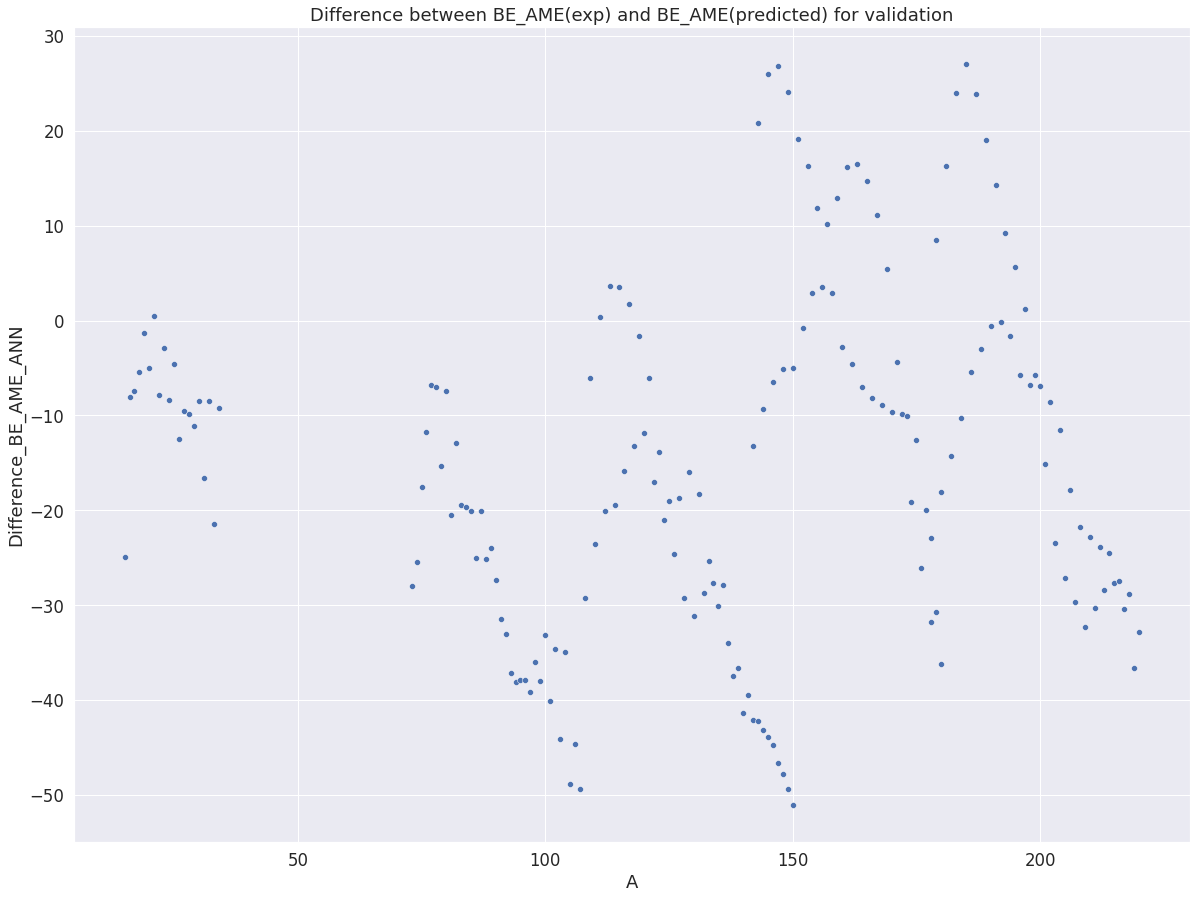

In [232]:
validation_predictions = model4.predict(x=([test_scaled_n, test_scaled_z, test_scaled_surf, test_scaled_coul, test_scaled_asym, test_scaled_pair, test_scaled_n_parity, test_scaled_z_parity, test_scaled_n_distance, test_scaled_z_distance]), batch_size=0)

validation_rescaled_predictions = [ (i - validation_scaler.min_)/validation_scaler.scale_ for i in validation_predictions]

validation_data["BE_Predictions"] = np.double(validation_rescaled_predictions)
validation_data["Difference_BE_AME_ANN"] = validation_data["ame_BE"] - validation_data["BE_Predictions"]


plt.figure(figsize =(20,15))
plt.title("Difference between BE_AME(exp) and BE_AME(predicted) for validation")

sns.scatterplot(x="A",y="Difference_BE_AME_ANN",data=validation_data, palette="rainbow_r")

In [233]:
rms_validation = np.sqrt(((validation_data["Difference_BE_AME_ANN"] ** 2).sum()) / len(validation_data["Difference_BE_AME_ANN"]))

print('RMS AME:', rms_validation)

RMS AME: 23.653132554733656
